# Guided Project: Visualizing The Gender Gap In College Degrees

The goal of the project is to visualize the gender gap across all college degree categories, using techniques such as despining, coloring, and annotations.

This project extends the work of the previous two missions in Dataquest.io: "Improving Plot Aesthetics" and "Color, Layout, and Annotations: Takeaways", which only compare STEM degrees.

The dataset, `percent-bachelors-degrees-women-usa.csv`, comes from [the Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) which releases an annual dataset regarding the percentage of bachelor's degrees awarded to women from 1970 to 2012, grouped into 17 categories of degree. Randal Olson, a data scientist at University of Pennsylvania, has cleaned the dataset and made it downloadable [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

## 1. Preview of Previous Code

Given codes are below.

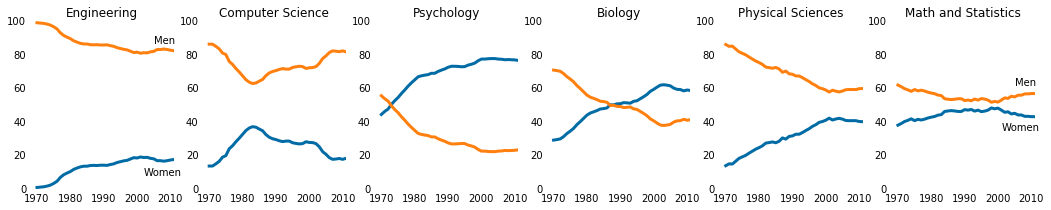

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

## 2. More Visualizations

We made a lot of tweeks to the previous code:

1. We disable the x-axis labels for all of the line charts except for the last subplot on each column, in order to make the subplots less clutterred.

2. We set the y-tick labels to just two numbers: 0 and 100. In addition, we create a helper horizontal line that implicitly indicates the y-position of 50.

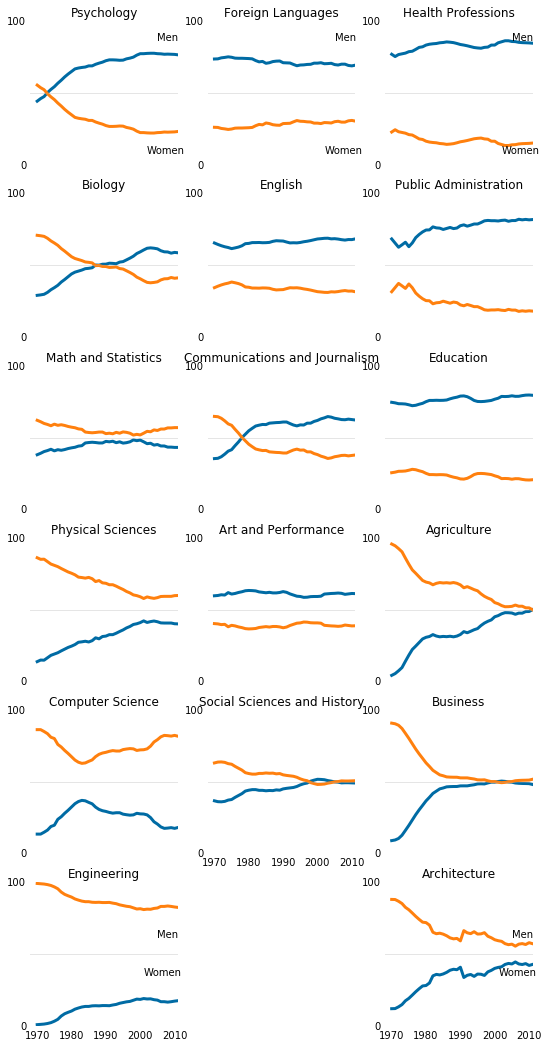

In [2]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize = (9, 18))
# To simplify, we put all variables of cats into a list
overall_cats = [stem_cats, lib_arts_cats, other_cats]
for c in range(3):
    # Determine whether graph in the top or bottom needs to be annotated
    top_text = True
    bottom_text = False if c == 1 else True
    n = len(overall_cats[c]) # The end of a column
    for sp in range(n):
        ax = fig.add_subplot(6, 3, 3*sp+c+1)
        degree = overall_cats[c][sp]
        ax.plot(women_degrees['Year'], women_degrees[degree], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[degree], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(degree)
        # Turning off the labelbottom keyword to turn off x-axis labelings
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
        # Adding some text on the top plot and/or bottom plot in each column
        # (if necessary)
        if top_text and sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        if bottom_text and sp == n-1:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')
        # Enabling x-label for the plot on the bottom on each column
        if sp == n-1:
            ax.tick_params(labelbottom='on')
        # Removing the y-axis tick labels, just two numbers
        ax.set_yticks([0,100])
        # Make a helper line y = 50
        ax.axhline(50, color = (171/255, 171/255, 171/255), alpha = 0.3)
plt.show()

## 3. Exporting Figure

In [3]:
fig.savefig("gender_degrees.png")

## 4. Conclusion

